# Data preparation

In [70]:
import pandas as pd
import glob
from tqdm import tqdm
import sage
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
datapath = "/mnt/storage/quarantine/data/"
treatment_df = pd.read_csv(datapath + "TheRedPill-comments.csv")
treatment_data = treatment_df[['body']]
treatment_size = treatment_data.shape[0]
print(treatment_size)

232859


/nethome/eshwar3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
control_size = 0
control_df = pd.DataFrame()

filelist = glob.glob(datapath + "control_subreddit_comments/*.csv")

with tqdm(total=len(filelist)) as pbar:
    for filename in filelist:
    #     print(filename)
        temp_df = pd.read_csv(filename)[['body']]
        control_size += control_df.shape[0]
        control_df = pd.concat([control_df, temp_df])

        pbar.write('processed: %s' %filename)
        pbar.update(1)
        
control_data = control_df.sample(n = treatment_size, random_state=42)

  1%|          | 1/100 [00:01<02:11,  1.33s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Shitstatistssay.csv


/nethome/eshwar3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
  2%|▏         | 2/100 [00:05<03:29,  2.14s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/steroids.csv


  3%|▎         | 3/100 [00:13<06:09,  3.81s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/NoFap.csv


  4%|▍         | 4/100 [00:15<05:16,  3.30s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/AskThe_Donald.csv


  5%|▌         | 5/100 [00:15<03:46,  2.39s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/DarkEnlightenment.csv


  6%|▌         | 6/100 [00:25<07:25,  4.74s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/KotakuInAction.csv


  7%|▋         | 7/100 [00:26<05:24,  3.49s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/askseddit.csv


/nethome/eshwar3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
  8%|▊         | 8/100 [00:27<04:20,  2.83s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Trufemcels.csv


  9%|▉         | 9/100 [00:28<03:21,  2.21s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/justlegbeardthings.csv


 10%|█         | 10/100 [00:29<02:54,  1.94s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/selfimprovement.csv


 11%|█         | 11/100 [00:30<02:29,  1.68s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Stoicism.csv


/nethome/eshwar3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (3,7,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 12%|█▏        | 12/100 [00:34<03:15,  2.22s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/metacanada.csv


/nethome/eshwar3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 13%|█▎        | 13/100 [00:39<04:25,  3.05s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/MensRights.csv


/nethome/eshwar3/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (0,1,2,4,5,8,9,10,15,16,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
 14%|█▍        | 14/100 [00:48<07:04,  4.93s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Drama.csv


 15%|█▌        | 15/100 [00:50<05:40,  4.01s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/tressless.csv


 16%|█▌        | 16/100 [00:52<04:39,  3.33s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/pornfree.csv


 17%|█▋        | 17/100 [00:53<03:41,  2.67s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/askMRP.csv


 18%|█▊        | 18/100 [00:54<02:58,  2.18s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/nSuns.csv


 19%|█▉        | 19/100 [00:59<04:16,  3.17s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/datingoverthirty.csv


 20%|██        | 20/100 [01:00<03:25,  2.56s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/TheNewRight.csv


 21%|██        | 21/100 [01:03<03:18,  2.52s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/weightroom.csv


 22%|██▏       | 22/100 [01:05<02:59,  2.31s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/antinatalism.csv


 23%|██▎       | 23/100 [01:07<03:05,  2.40s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/zen.csv


 24%|██▍       | 24/100 [01:08<02:29,  1.96s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/PussyPass.csv


 25%|██▌       | 25/100 [01:09<02:07,  1.71s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/StackAdvice.csv


 26%|██▌       | 26/100 [01:13<02:49,  2.29s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/ShitPoliticsSays.csv


 27%|██▋       | 27/100 [01:14<02:27,  2.02s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Semenretention.csv


 28%|██▊       | 28/100 [01:16<02:08,  1.79s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/marriedredpill.csv


 29%|██▉       | 29/100 [01:18<02:18,  1.96s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/BPDlovedones.csv


 30%|███       | 30/100 [01:20<02:11,  1.87s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/truerateme.csv


 31%|███       | 31/100 [01:21<01:57,  1.70s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/PEDs.csv


 32%|███▏      | 32/100 [01:24<02:27,  2.17s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/dating.csv


 33%|███▎      | 33/100 [01:26<02:24,  2.15s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/WhereAreAllTheGoodMen.csv


 34%|███▍      | 34/100 [01:27<01:58,  1.79s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/The30DayChallenge.csv


 35%|███▌      | 35/100 [01:31<02:29,  2.30s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/ForeverAlone.csv


 36%|███▌      | 36/100 [01:32<02:12,  2.08s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/amateur_boxing.csv


 37%|███▋      | 37/100 [01:34<01:57,  1.87s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/leangains.csv


 38%|███▊      | 38/100 [01:35<01:51,  1.80s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Brogress.csv


 39%|███▉      | 39/100 [01:36<01:37,  1.61s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Stronglifts5x5.csv


 40%|████      | 40/100 [01:42<02:51,  2.86s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/CapitalismVSocialism.csv


 41%|████      | 41/100 [01:44<02:32,  2.58s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/GoldandBlack.csv


 42%|████▏     | 42/100 [01:46<02:12,  2.28s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/subredditcancer.csv


 43%|████▎     | 43/100 [01:48<02:08,  2.26s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/gainit.csv


 44%|████▍     | 44/100 [01:49<01:48,  1.93s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/AmISexy.csv


 45%|████▌     | 45/100 [01:51<01:41,  1.84s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/TheBluePill.csv


 46%|████▌     | 46/100 [01:53<01:44,  1.93s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/IncelsWithoutHate.csv


 47%|████▋     | 47/100 [01:54<01:35,  1.80s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/leanfire.csv


 48%|████▊     | 48/100 [01:57<01:50,  2.13s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/socialskills.csv


 49%|████▉     | 49/100 [01:59<01:36,  1.90s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/SocialJusticeInAction.csv


 50%|█████     | 50/100 [02:01<01:38,  1.98s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/zerocarb.csv


 51%|█████     | 51/100 [02:07<02:33,  3.14s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/bodybuilding.csv


 52%|█████▏    | 52/100 [02:08<02:04,  2.60s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/EqualAttraction.csv


 53%|█████▎    | 53/100 [02:09<01:43,  2.20s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/SocialEngineering.csv


 54%|█████▍    | 54/100 [02:23<04:27,  5.81s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/MGTOW.csv


 55%|█████▌    | 55/100 [02:25<03:24,  4.54s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/RPChristians.csv


 56%|█████▌    | 56/100 [02:27<02:50,  3.86s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/sales.csv


 57%|█████▋    | 57/100 [02:33<03:09,  4.40s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/asktrp.csv


 58%|█████▊    | 58/100 [02:43<04:11,  5.98s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/JordanPeterson.csv


 59%|█████▉    | 59/100 [02:45<03:23,  4.96s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/martialarts.csv


 60%|██████    | 60/100 [02:47<02:38,  3.97s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/afinil.csv


 61%|██████    | 61/100 [02:49<02:14,  3.45s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/nattyorjuice.csv


 62%|██████▏   | 62/100 [02:53<02:14,  3.54s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Anarcho_Capitalism.csv


 63%|██████▎   | 63/100 [02:55<01:52,  3.05s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/sociopath.csv


 64%|██████▍   | 64/100 [02:57<01:38,  2.74s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/walkaway.csv


 65%|██████▌   | 65/100 [02:59<01:30,  2.58s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/RedPillWomen.csv


 66%|██████▌   | 66/100 [03:02<01:30,  2.65s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/bigdickproblems.csv


 67%|██████▋   | 67/100 [03:04<01:20,  2.45s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/phenibut.csv


 68%|██████▊   | 68/100 [03:06<01:11,  2.24s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/bald.csv


 69%|██████▉   | 69/100 [03:08<01:09,  2.23s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Supplements.csv


 70%|███████   | 70/100 [03:10<01:03,  2.13s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/naturalbodybuilding.csv


 71%|███████   | 71/100 [03:14<01:16,  2.64s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Divorce.csv


 72%|███████▏  | 72/100 [03:18<01:31,  3.27s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/collapse.csv


 73%|███████▎  | 73/100 [03:21<01:24,  3.12s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/short.csv


 74%|███████▍  | 74/100 [03:23<01:10,  2.71s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/BlackPillScience.csv


 75%|███████▌  | 75/100 [03:26<01:12,  2.88s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/aznidentity.csv


 76%|███████▌  | 76/100 [03:29<01:07,  2.80s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Testosterone.csv


 77%|███████▋  | 77/100 [03:31<00:58,  2.54s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/MGTOW2.csv


 78%|███████▊  | 78/100 [03:34<00:59,  2.70s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/fragrance.csv


 79%|███████▉  | 79/100 [03:37<00:59,  2.83s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/AskFeminists.csv


 80%|████████  | 80/100 [03:39<00:51,  2.57s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/nosurf.csv


 81%|████████  | 81/100 [03:41<00:47,  2.48s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/C_S_T.csv


 82%|████████▏ | 82/100 [03:45<00:50,  2.80s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/seduction.csv


 83%|████████▎ | 83/100 [03:53<01:14,  4.38s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/PurplePillDebate.csv


 84%|████████▍ | 84/100 [03:55<00:59,  3.75s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/MuayThai.csv


 85%|████████▌ | 85/100 [03:57<00:49,  3.27s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/StopGaming.csv


 86%|████████▌ | 86/100 [04:00<00:45,  3.26s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/lostgeneration.csv


 87%|████████▋ | 87/100 [04:03<00:40,  3.10s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/lawofattraction.csv


 88%|████████▊ | 88/100 [04:06<00:36,  3.02s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/entp.csv


 89%|████████▉ | 89/100 [04:08<00:30,  2.78s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/AsianMasculinity.csv


 90%|█████████ | 90/100 [04:11<00:29,  2.96s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Nootropics.csv


 91%|█████████ | 91/100 [04:13<00:23,  2.66s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/coldshowers.csv


 92%|█████████▏| 92/100 [04:16<00:21,  2.73s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/awakened.csv


 93%|█████████▎| 93/100 [04:19<00:18,  2.58s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/Incelselfies.csv


 94%|█████████▍| 94/100 [04:21<00:14,  2.45s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/AJelqForYou.csv


 95%|█████████▌| 95/100 [04:24<00:12,  2.56s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/hapas.csv


 96%|█████████▌| 96/100 [04:26<00:09,  2.49s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/whiteknighting.csv


 97%|█████████▋| 97/100 [04:34<00:12,  4.06s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/samharris.csv


 98%|█████████▊| 98/100 [04:37<00:07,  3.85s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/survivinginfidelity.csv


 99%|█████████▉| 99/100 [04:41<00:03,  3.78s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/pussypassdenied.csv


100%|██████████| 100/100 [04:43<00:00,  3.29s/it]

processed: /mnt/storage/quarantine/data/control_subreddit_comments/BattleOfTheSexes.csv


In [34]:
control_data.to_csv('control_comments.txt', index = False, header=False)
treatment_data.to_csv('treatment_comments.txt', index = False, header = False)

# SAGE analysis

In [36]:
import sage
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from glob import glob
import csv
import os

In [37]:
vect = CountVectorizer(max_features=5000)

In [44]:
# filenames = glob(datapath + '*_comments.txt')
filenames = ['/mnt/storage/quarantine/data/control_comments.txt', '/mnt/storage/quarantine/data/treatment_comments.txt']

In [45]:
print(filenames)

['/mnt/storage/quarantine/data/control_comments.txt', '/mnt/storage/quarantine/data/treatment_comments.txt']


In [46]:
def getData(filenames):
    for filename in filenames:
        with open(filename) as fin:
            for line in fin:
                yield line

Here we read in the data. This takes a minute or two.

In [47]:
X = vect.fit_transform(getData(filenames))

In [48]:
X.shape

(1220718, 5000)

Convenience for figuring out the number of lines in each file

In [49]:
def getNumLines(filename):
    with open(filename) as fin:
        return len([line for line in fin])

In [50]:
N = [getNumLines(filename) for filename in filenames]

In [51]:
idxs = np.array([0] + N).cumsum()
x = np.array([np.array(X[start:stop,:].sum(axis=0))[0] for start,stop in zip(idxs[:-1],idxs[1:])])

In [52]:
print(idxs)

[      0  565957 1220718]


Base rate language model

In [53]:
smoother = 10.
mu = np.log(x[0]+smoother) - np.log((x[0]+smoother).sum())

Think think think

In [54]:
eta = sage.estimate(x[1],mu,max_its=25)

In [57]:
vocab = {i:j for j,i in vect.vocabulary_.items()}

In [58]:
with open('sage-output.csv','w') as fout:
    writer = csv.DictWriter(fout,fieldnames=['word','sage',
                                             'base_count',
                                             'base_rate',
                                             'treatment_count',
                                             'treatment_rate'])
    writer.writeheader()
    for word in sage.topK(eta,vocab,100):
        i = vect.vocabulary_[word]
        writer.writerow({'word':word,
                         'sage':eta[i],
                         'base_count':x[0,i],
                         'base_rate':x[0,i]/float(x[0].sum()),
                         'treatment_count':x[1,i],
                         'treatment_rate':x[1,i]/float(x[1].sum())
                        })    

In [65]:
print(sage.topK(eta,vocab))

['theredpill', 'more_silence_from_reddit_administration_a_failure', '9sdg04', 'quarantined', '80kgg6', 'shit_to_avoid_saying_in_modmail', 'trp', 'rollo', 'glo', 'backup']


In [68]:
print(sage.topK(-eta,vocab))

['megalodon', 'snapshillbot', 'get_simple', 'mnemosyne', 'reddiquette', 'survivinginfidelity', '_megalodon', 'kotakuinaction', 'resubmit', 'removeddit']


(array([3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
        3.000e+00, 8.000e+00, 7.000e+00, 3.900e+01, 1.290e+02, 4.750e+02,
        2.319e+03, 1.601e+03, 2.760e+02, 7.500e+01, 3.400e+01, 1.200e+01,
        4.000e+00, 4.000e+00]),
 array([-7.03318883, -6.48625059, -5.93931236, -5.39237412, -4.84543589,
        -4.29849765, -3.75155942, -3.20462118, -2.65768295, -2.11074471,
        -1.56380648, -1.01686824, -0.46993001,  0.07700823,  0.62394646,
         1.1708847 ,  1.71782293,  2.26476117,  2.8116994 ,  3.35863764,
         3.90557587]),
 <a list of 20 Patch objects>)

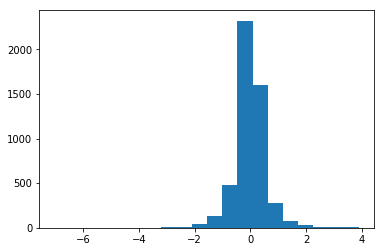

In [71]:
plt.hist(eta,20)

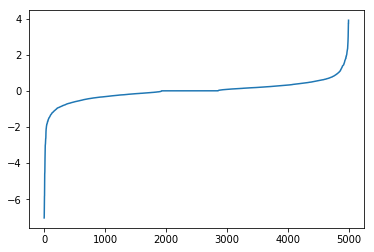

In [72]:
plt.plot(sorted(eta));

In [66]:
sage_lex = pd.read_csv('sage-output.csv')
sage_lex[sage_lex.base_count >= 100]

,word,sage,base_count,base_rate,treatment_count,treatment_rate
0,theredpill,3.905576,121,0.000015,7496,0.000706
6,trp,3.010930,617,0.000075,14665,0.001382
15,smv,2.345077,247,0.000030,3089,0.000291
16,redpill,2.316582,132,0.000016,1659,0.000156
17,ltr,2.313719,314,0.000038,3774,0.000356
18,oneitis,2.312531,111,0.000013,1408,0.000133
20,forums,2.248905,221,0.000027,2522,0.000238
21,alpha,2.237094,647,0.000078,7088,0.000668
22,asktrp,2.207064,115,0.000014,1309,0.000123
26,beta,2.117343,759,0.000092,7360,0.000694
